In [26]:
%load_ext autoreload
%autoreload 2


In [34]:
from domino.slices import collect_settings
from domino.slices.celeba import CelebASliceBuilder
from domino.evaluate import run_sdm, score_sdms
import numpy as np
import terra

In [37]:
terra.inp(score_sdms.inp()["setting_dp"].run_id)["setting_dp"]

{'setting_dp': {'__run_dir__': '/home/sabri/terra/slice/tasks/train/score_settings/_runs/15052', '__key__': '30e8630332f7484f8064867971314366', '__type__': <class 'meerkat.datapanel.DataPanel'>, '__id__': 209838},
 'emb_dp': {'clip': {'__run_dir__': '/home/sabri/terra/slice/tasks/emb/clip/embed_images/_runs/14406', '__key__': '704eb5685cd94098bd12dbccf6f24be4', '__type__': <class 'meerkat.datapanel.DataPanel'>, '__id__': 206970}},
 'word_dp': {'__run_dir__': '/home/sabri/terra/slice/tasks/emb/clip/embed_words/_runs/14469', '__key__': 'c633b5242495400291272fa21fc4717d', '__type__': <class 'meerkat.datapanel.DataPanel'>, '__id__': 207313},
 'sdm_config': [{'sdm_class': domino.sdm.gmm.MixtureModelSDM,
   'sdm_config': {'weight_y_log_likelihood': 10,
    'n_slices': 5,
    'emb': {'grid_search': [['clip', 'emb']]}}}],
 'id_column': 'image_id',
 'run_dir': '/home/sabri/terra/slice/tasks/evaluate/run_sdms/_runs/15074'}

In [28]:
score_df = score_sdms.out().load()

In [30]:
score_df.iloc[score_df.reset_index().groupby(["target", "slice_idx"])['precision_at_10'].idxmax().astype(int)]


,pred_slice_idx,slice_idx,auroc,precision_at_10,precision_at_25,precision_at_100,recall_at_50,recall_at_100,recall_at_200,recall,precision,target,run_sdm_run_id
50,0,0,0.737254,0.4,0.36,0.27,0.016949,0.035202,0.071708,0.256845,0.228538,bangs,15080
56,1,1,0.978608,0.3,0.56,0.63,0.033943,0.082245,0.178851,0.849869,0.810710,bangs,15080
21,1,0,0.814091,0.7,0.68,0.52,0.191011,0.292135,0.370787,1.000000,0.033623,brown_hair,15077
27,2,1,0.986306,0.9,0.96,0.80,0.314685,0.559441,0.762238,0.825175,0.143204,brown_hair,15077
30,0,0,0.500000,0.0,0.00,0.01,0.000000,0.000000,0.000000,0.000000,0.000000,eyeglasses,15078
38,3,1,0.990837,0.8,0.88,0.77,0.221106,0.386935,0.663317,0.467337,0.732283,eyeglasses,15078
42,2,0,0.845456,0.6,0.40,0.14,0.151899,0.177215,0.202532,0.455696,0.053333,goatee,15079
85,0,1,0.995191,0.9,0.96,0.78,0.362903,0.629032,0.903226,0.524194,0.812500,goatee,15083
61,1,0,0.655419,0.6,0.56,0.36,0.054974,0.094241,0.138743,0.798429,0.084277,wearing_earrings,15081
67,2,1,0.952113,1.0,0.92,0.73,0.119363,0.193634,0.336870,0.432361,0.348291,wearing_earrings,15081


In [180]:
inp = run_sdm.inp(run_id=14533, load=True)
print(inp)
data_dp, emb_dp = inp["data_dp"], inp["emb_dp"]

data_dp = data_dp.lz[data_dp["split"].isin(["valid", "test"])].merge(
    emb_dp[["image_id", "emb"]], on="image_id"
)

{'data_dp': DataPanel(nrows: 29999, ncols: 51), 'emb_dp': DataPanel(nrows: 61910, ncols: 49), 'model': None, 'id_column': 'image_id', 'word_dp': DataPanel(nrows: 10000, ncols: 5), 'sdm_class': <class 'domino.sdm.gmm.MixtureModelSDM'>, 'sdm_config': {'weight_y_log_likelihood': 10, 'n_slices': 5, 'emb': 'emb'}, 'build_setting_run_id': 14521, 'corr': 0.0, 'correlate': 'young', 'dataset': 'celeba', 'index': '100', 'n': 30000, 'parent_run_id': 14517, 'score_model_run_id': 14521, 'setting_id': 100, 'slice_category': 'correlation', 'synthetic_preds': True, 'target': 'no_beard'}


In [181]:
from domino.sdm import MixtureModelSDM, SpotlightSDM
sdm = MixtureModelSDM(
    n_slices=5, 
    n_clusters=10, 
    weight_y_log_likelihood=10, 
    init_params="error",
    emb="emb",
    pca_components=128 
)

sdm.fit(data_dp.lz[data_dp["split"] == "valid"])
dp = sdm.transform(data_dp.lz[data_dp["split"] == "test"])

 11%|█         | 11/100 [00:00<00:01, 57.87it/s]


In [194]:
from domino.metrics import compute_sdm_metrics
slice_idx = 1

metrics_df = compute_sdm_metrics(dp)
metrics_df[metrics_df["slice_idx"] == slice_idx].sort_values(by="auroc", ascending=False)

,pred_slice_idx,slice_idx,auroc,precision_at_10,precision_at_25,precision_at_100,recall_at_50,recall_at_100,recall_at_200,recall,precision
8,3,1,0.910184,1.0,1.00,1.00,0.047847,0.095694,0.184689,0.480383,0.415907
6,1,1,0.798508,1.0,0.84,0.64,0.032536,0.061244,0.105263,0.519617,0.151761
5,0,1,0.486083,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
7,2,1,0.439463,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
9,4,1,0.436335,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000


In [195]:
from domino.emb.clip import embed_words
pred_slice_idx = 3
words_dp = embed_words.out(14469).load().lz[:int(1.1e4)]
expl_dp = sdm.explain(words_dp=words_dp, data_dp=dp)
expl_dp.lz[(-expl_dp["pred_slices"][:, pred_slice_idx]).argsort()[:10]]

AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

In [197]:

words_dp = words_dp.view()
slice_proto = (
    np.dot(dp["pred_slices"].T, dp["emb"])
    / dp["pred_slices"].sum(axis=0, keepdims=True).T
)
pred_slice = dp["pred_slices"][:, pred_slice_idx]
slice_proto = dp.lz[pred_slice.argsort()[-10:]]["emb"].mean(axis=0)
#slice_proto = dp.lz[dp["probs"].argsort()[-25:]]["emb"].mean(axis=0)


ref_proto = dp["emb"][dp["target"] == 0].data.mean(axis=0)

words_dp["pred_slices"] = np.dot(
    words_dp["emb"].data, (slice_proto - ref_proto).T
)
expl_dp = words_dp[["word", "pred_slices", "frequency"]]
expl_dp.lz[(-expl_dp["pred_slices"]).argsort()[:10]]

,word (PandasSeriesColumn),pred_slices (NumpyArrayColumn),frequency (PandasSeriesColumn)
0,emeritus,4.902344,22397
1,elder,4.718750,58028
2,secretariat,4.296875,16516
3,hatch,4.253906,16570
4,mantle,3.988281,13085
5,elderly,3.929688,26546
6,president,3.773438,788031
7,mao,3.767578,11906
8,sessions,3.667969,66055
9,xi,3.529297,37431


In [149]:
dp["probs"]

,(NumpyArrayColumn)
0,0.572671
1,0.002813
2,0.289787
3,0.471853
4,0.808809
...,...
6260,0.000028
6261,0.335455
6262,0.000874
6263,0.064662


,image_id (PandasSeriesColumn),identity (PandasSeriesColumn),file (PandasSeriesColumn),5_o_clock_shadow (PandasSeriesColumn),arched_eyebrows (PandasSeriesColumn),attractive (PandasSeriesColumn),bags_under_eyes (PandasSeriesColumn),bald (PandasSeriesColumn),bangs (PandasSeriesColumn),big_lips (PandasSeriesColumn),big_nose (PandasSeriesColumn),black_hair (PandasSeriesColumn),blond_hair (PandasSeriesColumn),blurry (PandasSeriesColumn),brown_hair (PandasSeriesColumn),bushy_eyebrows (PandasSeriesColumn),chubby (PandasSeriesColumn),double_chin (PandasSeriesColumn),eyeglasses (PandasSeriesColumn),goatee (PandasSeriesColumn),gray_hair (PandasSeriesColumn),heavy_makeup (PandasSeriesColumn),high_cheekbones (PandasSeriesColumn),male (PandasSeriesColumn),mouth_slightly_open (PandasSeriesColumn),mustache (PandasSeriesColumn),narrow_eyes (PandasSeriesColumn),no_beard (PandasSeriesColumn),oval_face (PandasSeriesColumn),pale_skin (PandasSeriesColumn),pointy_nose (PandasSeriesColumn),receding_hairline (PandasSeriesColumn),rosy_cheeks (PandasSeriesColumn),sideburns (PandasSeriesColumn),smiling (PandasSeriesColumn),straight_hair (PandasSeriesColumn),wavy_hair (PandasSeriesColumn),wearing_earrings (PandasSeriesColumn),wearing_hat (PandasSeriesColumn),wearing_lipstick (PandasSeriesColumn),wearing_necklace (PandasSeriesColumn),wearing_necktie (PandasSeriesColumn),young (PandasSeriesColumn),img_path (PandasSeriesColumn),index (PandasSeriesColumn),image (ImageColumn),slices (NumpyArrayColumn),target (NumpyArrayColumn),correlate (NumpyArrayColumn),probs (NumpyArrayColumn),split (PandasSeriesColumn),emb (NumpyArrayColumn),pred_slices (NumpyArrayColumn)
0,116204.jpg,10140.0,116204.jpg,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,/home/common/datasets/celeba/img_align_celeba/116204.jpg,7173,,"np.ndarray(shape=(2,))",0.0,1.0,4.951301e-01,test,"np.ndarray(shape=(512,))","np.ndarray(shape=(5,))"
1,098610.jpg,10140.0,098610.jpg,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,/home/common/datasets/celeba/img_align_celeba/098610.jpg,7173,,"np.ndarray(shape=(2,))",0.0,1.0,7.636984e-01,test,"np.ndarray(shape=(512,))","np.ndarray(shape=(5,))"
2,097363.jpg,3954.0,097363.jpg,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,/home/common/datasets/celeba/img_align_celeba/097363.jpg,3816,,"np.ndarray(shape=(2,))",0.0,1.0,8.906331e-01,test,"np.ndarray(shape=(512,))","np.ndarray(shape=(5,))"
3,108593.jpg,3954.0,108593.jpg,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,/home/common/datasets/celeba/img_align_celeba/108593.jpg,3816,,"np.ndarray(shape=(2,))",0.0,1.0,9.998295e-01,test,"np.ndarray(shape=(512,))","np.ndarray(shape=(5,))"
4,147479.jpg,3954.0,147479.jpg,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,/home/common/datasets/celeba/img_align_celeba/147479.jpg,3816,,"np.ndarray(shape=(2,))",0.0,1.0,2.006541e-01,test,"np.ndarray(shape=(512,))","np.ndarray(shape=(5,))"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,157945.jpg,7810.0,157945.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,/home/common/datasets/celeba/img_align_celeba/157945.jpg,2817,,"np.ndarray(shape=(2,))",0.0,0.0,2.373349e-07,test,"np.ndarray(shape=(512,))","np.nda
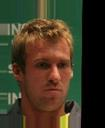
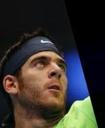
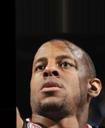
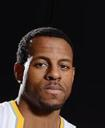
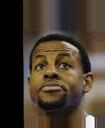
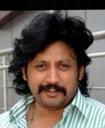
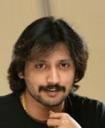
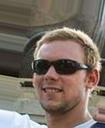
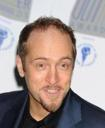
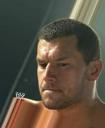

In [193]:

dp.lz[dp["target"] == 0]#[["object_image", "target", "slice"]]

,image_id (PandasSeriesColumn),identity (PandasSeriesColumn),file (PandasSeriesColumn),5_o_clock_shadow (PandasSeriesColumn),arched_eyebrows (PandasSeriesColumn),attractive (PandasSeriesColumn),bags_under_eyes (PandasSeriesColumn),bald (PandasSeriesColumn),bangs (PandasSeriesColumn),big_lips (PandasSeriesColumn),big_nose (PandasSeriesColumn),black_hair (PandasSeriesColumn),blond_hair (PandasSeriesColumn),blurry (PandasSeriesColumn),brown_hair (PandasSeriesColumn),bushy_eyebrows (PandasSeriesColumn),chubby (PandasSeriesColumn),double_chin (PandasSeriesColumn),eyeglasses (PandasSeriesColumn),goatee (PandasSeriesColumn),gray_hair (PandasSeriesColumn),heavy_makeup (PandasSeriesColumn),high_cheekbones (PandasSeriesColumn),male (PandasSeriesColumn),mouth_slightly_open (PandasSeriesColumn),mustache (PandasSeriesColumn),narrow_eyes (PandasSeriesColumn),no_beard (PandasSeriesColumn),oval_face (PandasSeriesColumn),pale_skin (PandasSeriesColumn),pointy_nose (PandasSeriesColumn),receding_hairline (PandasSeriesColumn),rosy_cheeks (PandasSeriesColumn),sideburns (PandasSeriesColumn),smiling (PandasSeriesColumn),straight_hair (PandasSeriesColumn),wavy_hair (PandasSeriesColumn),wearing_earrings (PandasSeriesColumn),wearing_hat (PandasSeriesColumn),wearing_lipstick (PandasSeriesColumn),wearing_necklace (PandasSeriesColumn),wearing_necktie (PandasSeriesColumn),young (PandasSeriesColumn),img_path (PandasSeriesColumn),index (PandasSeriesColumn),image (ImageColumn),slices (NumpyArrayColumn),target (NumpyArrayColumn),correlate (NumpyArrayColumn),probs (NumpyArrayColumn),split (PandasSeriesColumn),emb (NumpyArrayColumn),pred_slices (NumpyArrayColumn)
0,053577.jpg,8993,053577.jpg,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,/home/common/datasets/celeba/img_align_celeba/053577.jpg,7352,,"np.ndarray(shape=(2,))",0,1,0.965379,test,"np.ndarray(shape=(512,))","np.ndarray(shape=(5,))"
1,148578.jpg,5579,148578.jpg,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,/home/common/datasets/celeba/img_align_celeba/148578.jpg,1124,,"np.ndarray(shape=(2,))",0,1,0.885066,test,"np.ndarray(shape=(512,))","np.ndarray(shape=(5,))"
2,095813.jpg,2070,095813.jpg,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,/home/common/datasets/celeba/img_align_celeba/095813.jpg,5782,,"np.ndarray(shape=(2,))",0,1,0.964774,test,"np.ndarray(shape=(512,))","np.ndarray(shape=(5,))"
3,023041.jpg,4073,023041.jpg,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,/home/common/datasets/celeba/img_align_celeba/023041.jpg,7120,,"np.ndarray(shape=(2,))",0,1,0.989564,test,"np.ndarray(shape=(512,))","np.ndarray(shape=(5,))"
4,092077.jpg,8741,092077.jpg,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,/home/common/datasets/celeba/img_align_celeba/092077.jpg,376,,"np.ndarray(shape=(2,))",0,1,0.912414,test,"np.ndarray(shape=(512,))","np.ndarray(shape=(5,))"
5,167621.jpg,4404,167621.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,/home/common/datasets/celeba/img_align_celeba/167621.jpg,8288,,"np.ndarray(shape=(2,))",0,1,0.995984,test,"np.ndarray(shape=(512,))","np.ndarray(shape=(5,))"
6,132408.jpg,9951,132408.jpg,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,/home/common/datasets/celeba/img_align_celeba/132408.jpg,5417,,"np.ndarray(shape=(2,))",0,1,0.983479,test,"np.ndarray(shape=(512,))","np.ndarray(shape=(5,))"
7,201005.jpg,6153,201005.jpg,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,/home/common/datasets/celeba/img_align_celeba/201005.jpg,9497,,"np.ndarray(shape=(2,))",0,0,0.989203,test,"np.ndarray(shape=(512,))","np.ndarray(shape=(5,))"
8,109128.jpg,498,109128.jpg,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,/home/common/datasets/celeba/img_align_celeba/109128.jpg,7682,,"np.ndarray(shape=(2,))",0,1,0.991485,t
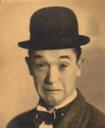
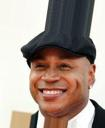
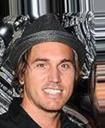
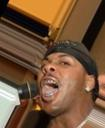
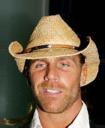
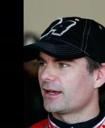
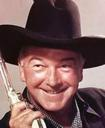
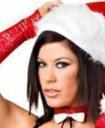
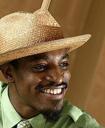
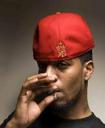

In [138]:

dp.lz[dp["pred_slices"].data[:, pred_slice_idx].argsort()[-10:]]#[["object_image", "target", "slice"]]

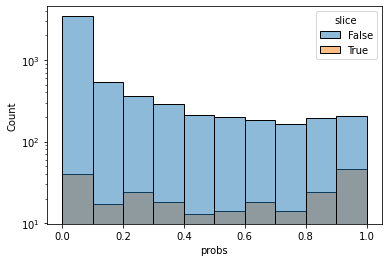

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plot_df = pd.DataFrame(
    {"probs": dp["probs"], "slice": dp["slices"][:, slice_idx], "target": dp["target"]}
)
sns.histplot(
    data=plot_df[plot_df["target"] == 0],
    x="probs",
    hue="slice",
    stat="count",
    common_norm=not False,
    binwidth=0.1,
)
plt.yscale("log")


In [6]:
from domino.train import score_settings, train_settings, score_model, train_model

In [5]:
score_settings.out().load()["score_model_run_id"]

,(PandasSeriesColumn)
0,15006
1,15007
2,15008
3,15005
4,15009
5,15010
6,15011
7,15012
8,15014
9,15013


In [8]:
score_dp = score_model.out(15006).load()

In [18]:
from sklearn.metrics import roc_auc_score
mask = score_dp["target"] != score_dp["correlate"]
roc_auc_score(score_dp.lz[mask]["target"], score_dp.lz[mask]["probs"][:, 1])

0.26252927075972343

In [13]:
score_dp["probs"] = score_dp["output"].probabilities()

In [10]:
from domino.train import score_settings, synthetic_score_settings, score_model

In [5]:
type(synthetic_score_settings.out().load())

meerkat.datapanel.DataPanel

In [19]:
score_settings.out()[0].load()

,train_model_run_id (PandasSeriesColumn),setting_id (NumpyArrayColumn),corr (NumpyArrayColumn),correlate (PandasSeriesColumn),dataset (PandasSeriesColumn),n (NumpyArrayColumn),slice_category (PandasSeriesColumn),target (PandasSeriesColumn),index (PandasSeriesColumn),parent_run_id (PandasSeriesColumn),build_setting_run_id (PandasSeriesColumn),time_this_iter_s (PandasSeriesColumn),done (PandasSeriesColumn),timesteps_total (PandasSeriesColumn),episodes_total (PandasSeriesColumn),training_iteration (PandasSeriesColumn),experiment_id (PandasSeriesColumn),date (PandasSeriesColumn),timestamp (PandasSeriesColumn),time_total_s (PandasSeriesColumn),pid (PandasSeriesColumn),hostname (PandasSeriesColumn),node_ip (PandasSeriesColumn),time_since_restore (PandasSeriesColumn),timesteps_since_restore (PandasSeriesColumn),iterations_since_restore (PandasSeriesColumn),trial_id (PandasSeriesColumn),config/corr (PandasSeriesColumn),config/correlate (PandasSeriesColumn),config/dataset (PandasSeriesColumn),config/index (PandasSeriesColumn),config/n (PandasSeriesColumn),config/setting_id (PandasSeriesColumn),config/slice_category (PandasSeriesColumn),config/target (PandasSeriesColumn),logdir (PandasSeriesColumn),score_settings_run_id (PandasSeriesColumn),score_model_run_id (PandasSeriesColumn),synthetic_preds (PandasSeriesColumn)
0,14936,163,0.6,blond_hair,celeba,30000,correlation,wearing_necklace,0,14928,14930,1112.037066,False,NaN,NaN,1,8ef98aebaa294f1f8875ae337af348ea,2021-09-22_12-08-35,1632312515,1112.037066,198,run-script-nf5ts,10.92.1.25,1112.037066,0,1,36c4b_00000,0.6,blond_hair,celeba,163,30000,163,correlation,wearing_necklace,"/root/ray_results/_train_model_2021-09-22_11-49-59/_train_model_36c4b_00000_0_config={'corr': 0.6000000000000001, 'correlate': 'blond_hair', 'dataset': 'celeba', 'n': 30000, 'slice__2021-09-22_11-49-59",15044,15045,False
1,14933,139,0.8,eyeglasses,celeba,30000,correlation,wearing_hat,1,14928,14931,1116.230135,False,NaN,NaN,1,20a0c9441e584990983fc829547b6915,2021-09-22_12-08-39,1632312519,1116.230135,196,run-script-nf5ts,10.92.1.25,1116.230135,0,1,36c4b_00001,0.8,eyeglasses,celeba,139,30000,139,correlation,wearing_hat,"/root/ray_results/_train_model_2021-09-22_11-49-59/_train_model_36c4b_00001_1_config={'corr': 0.8, 'correlate': 'eyeglasses', 'dataset': 'celeba', 'n': 30000, 'slice_category': 'cor_2021-09-22_11-49-59",15044,15046,False


In [24]:
score_model.out(15045)[0].load()["split"].unique()

array(['train', 'valid'], dtype=object)